In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import math

# Fourier Series

A Fourier series says that every periodic signal can be synthesized as a sum of harmonically related sinusoids.

\begin{equation}
    x(t) = \sum_{k=-\infty}^{\infty} a_k e^{j(2\pi/T_0)kt}
\end{equation}

There are two aspects of the Fourier theory: analysis and synthesis. Starting from $x(t)$ and calculating ${a_k}$ is called Fourier analysis. The reverse process of starting from ${a_k}$ and generating $x(t)$ is called Fourier synthesis.

Fourier Analysis Integral:

$$a_k = \frac{1}{T_0}\int_0^{T_0} x(t) e^{-j(2\pi/T_0)kt} dt$$

Only need one period, so $T_0$ should be the fundamental period of $x(t)$. Result should depend on $k$ alone. Thus, it is common to refer to the function $x(t)$ as the *time-domain representation* of a periodic signal, and the coefficients ${a_k}$ as the *frequency domain representation* or the *spectrum representation of the signal*.

The Fourier series coefficient for $k = 0$ has a special interpretation as the *average value* of the signal $x(t)$. The **DC component** is:

$$\omega_0 = \frac{1}{T_0}\int_0^{T_0} x(t) dt $$

The synthesis formula usually can be simplified to a cosine form:

$$ x_N(t) = \sum_{k=-N}^{N} a_k e^{j(2\pi/T_0)kt} $$

# Time-Frequency Spectrum

We have seen that a wide range of interesting waveforms can be synthesized by a sum of sinusoids:

$$ x(t) = A_0 + \sum_{k=1}^N A_k \cos(2\pi f_kt + \phi_k)$$ 

One assumption we have made so far is that the amplitudes, phases, and frequencies in do not change with time. However, most real-world signals exhibit frequency changes over time.

In any event, most interesting signals can be modeled as a sum of sinusoids if we let the frequencies, amplitudes, and phases vary with time. Therefore, we need a way to describe such time–frequency variations which leads us to study the concept of a time–frequency spectrum. The most common time–frequency representation is the **spectrogram**.

In [9]:
# Cell 2: Define the plotting function
def plot_spectrogram(signal, fs, nperseg=256, noverlap=None, cmap='viridis'):
    """
    Plots a spectrogram of the given signal.

    Parameters:
        signal (1D array): Input signal
        fs (float): Sampling frequency (Hz)
        nperseg (int): Length of each segment (default: 256)
        noverlap (int or None): Number of overlapping samples (default: nperseg // 2)
        cmap (str): Colormap for the spectrogram (default: 'viridis')
    """
    if noverlap is None:
        noverlap = nperseg // 2

    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap=cmap)
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.ylim(200, 600)
    plt.show()


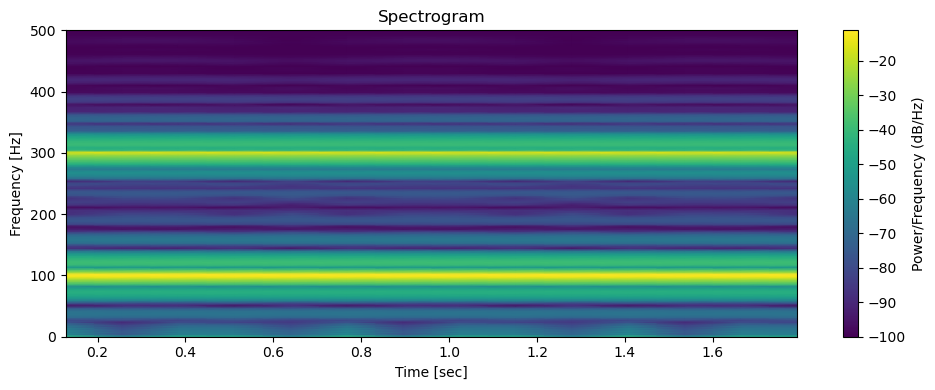

In [7]:
# Cell 3: Generate an example signal and plot it
# Example signal: 100 Hz + 300 Hz tones
fs = 1000  # Sampling rate (Hz)
duration = 2  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.sin(2 * np.pi * 300 * t)

# Plot the spectrogram
plot_spectrogram(signal, fs)


In [4]:
def plot_log_spectrogram(signal, fs, nperseg=2048, noverlap=1024, cmap='magma'):
    """
    Plot a log-frequency spectrogram.
    """
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    plt.figure(figsize=(12, 5))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap=cmap)
    plt.yscale('log')
    plt.ylim([20, fs // 2])  # Human hearing range lower bound
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.ylabel('Frequency [Hz] (log scale)')
    plt.xlabel('Time [s]')
    plt.title('Log-Scale Spectrogram of C Major Scale')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


In [11]:
def generate_c_major_scale(fs=44100, note_duration=0.2):
    """
    Generate a C major scale as a concatenated waveform of sine waves.
    
    Notes: C4-D4-E4-F4-G4-A4-B4-C5
    Frequencies in Hz: 261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25
    """
    freqs = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
    scale = np.concatenate([
        np.sin(2 * np.pi * f * np.linspace(0, note_duration, int(fs * note_duration), endpoint=False))
        for f in freqs
    ])
    return scale, fs


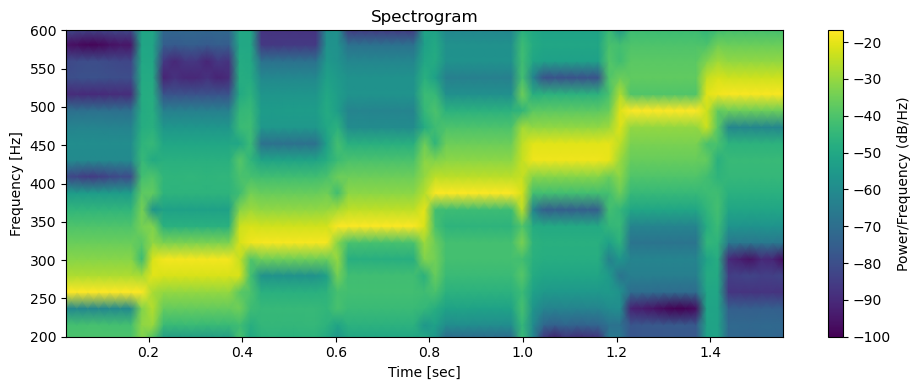

In [13]:
signal, fs = generate_c_major_scale()
#plot_log_spectrogram(signal, fs)
plot_spectrogram(signal, fs,2048,1024)

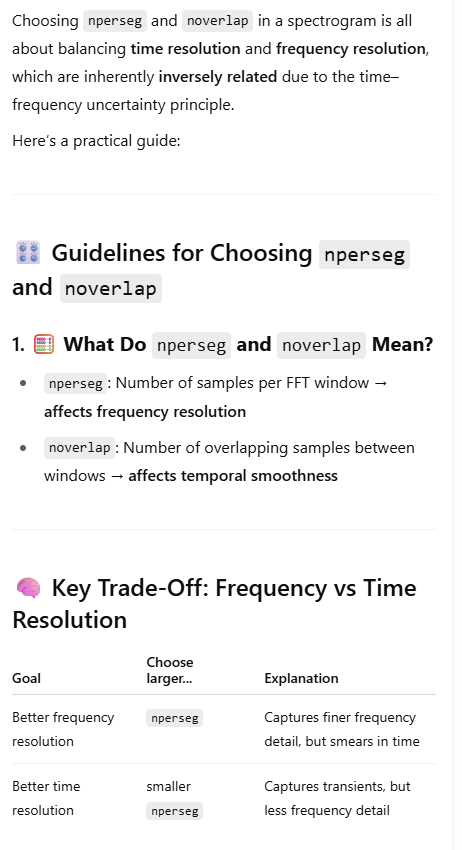

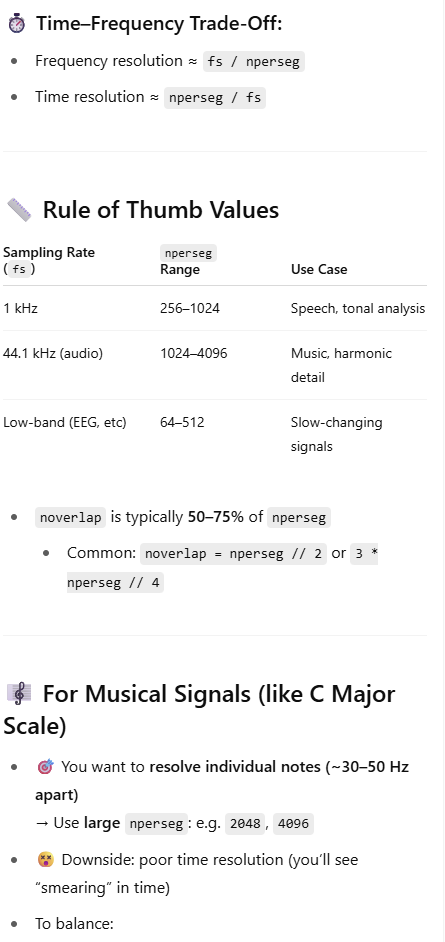

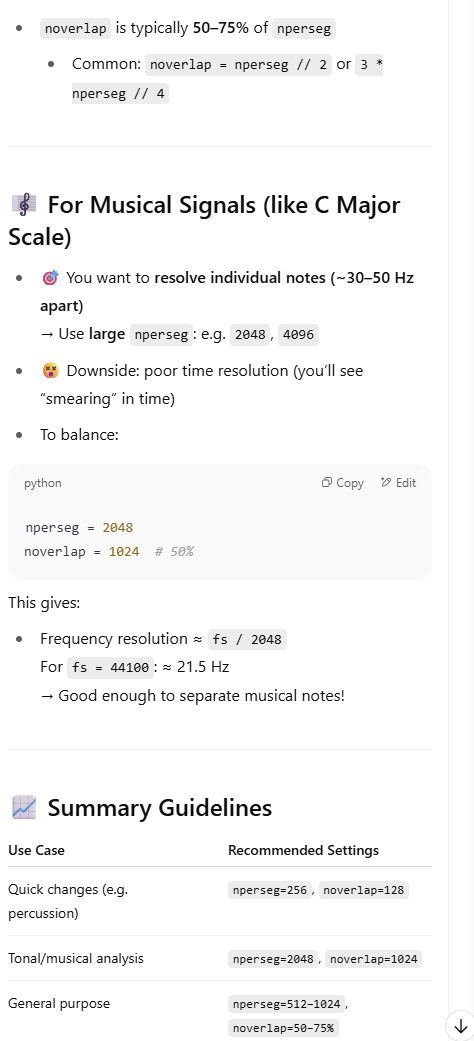

## Chirp signals & Frequency Modulation (FM)

Need the angle function of the cosine:

$$\psi(t) = \omega_0t + \phi$$

The chirp is a linear function, and we need the instantaneous frequency, which can be found by differeniating the angle function:

$$f_i(t) = \frac{1}{2\pi}\frac{d}{dt}\psi(t) $$ in Hz. An easy way of calculating this is to think of the bounds of the frequencies needing to be swept over and quantize them by the amount of time the sweep takes, as the linear coefficient $\mu$. So if a signal sweeps between $f_{low}$ and $f_{high}$ over $T_0$ seconds, then the instantaneous frequency is:

$$f_i(t) = \frac{f_{high}-f_{low}}{T_0}t + f_{low}$$

This is an example of a linear FM signal.

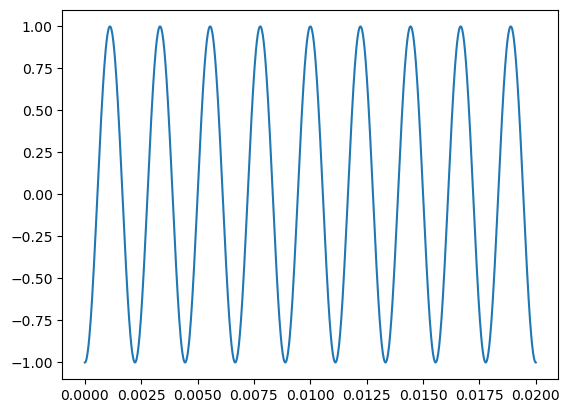

In [31]:
# Chirp signals and instantaneous frequency

f1 = 300 # Hz
f2 = 800
T2 = 20e-3 # ms
t = np.linspace(0,20e-3,1000)
phi1=np.pi

x1 = np.cos(2*np.pi*450*t+phi1)

plt.plot(t,x1)

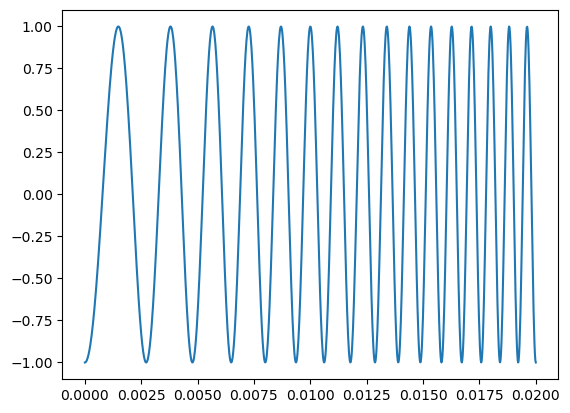

In [32]:
fi = ((f2 - f1)/T2)*t + f1 

x2 = np.cos(2*np.pi*fi*t+phi1)

plt.plot(t,x2)

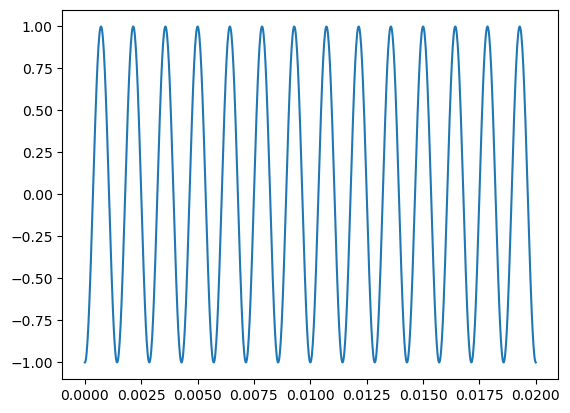

In [34]:
x3 = np.cos(2*np.pi*700*t+phi1)
plt.plot(t,x3)

# Discrete Fourier Transform - DSP Scientists & Engineers Ch8

Digital computers can only work with information that is discrete and finite in length. When you sit down to your computer, you will only use the DFT. 

The key point to understand is that this periodicity is invoked in order to use a mathematical tool, i.e., the DFT. It is usually meaningless in terms of where the signal originated or how it was acquired.

The mathematical term: transform, is extensively used in Digital Signal
Processing, such as: Fourier transform, Laplace transform, Z transform,
Hilbert transform, Discrete Cosine transform, etc. Just what is a transform?

*Transforms* are a direct extension of this, allowing both the input and output to have multiple values. Suppose you have a signal composed of 100 samples. If you devise some equation, algorithm, or procedure for changing these 100 samples into another 100 samples, you have yourself a transform.

The discrete Fourier transform changes an N point input signal into two N/2%1 point output signals. The input signal contains the signal being decomposed, while the two output signals contain the amplitudes of the component sine and cosine waves (scaled in a way we will discuss shortly). The input signal is said to be in the **time domain**.

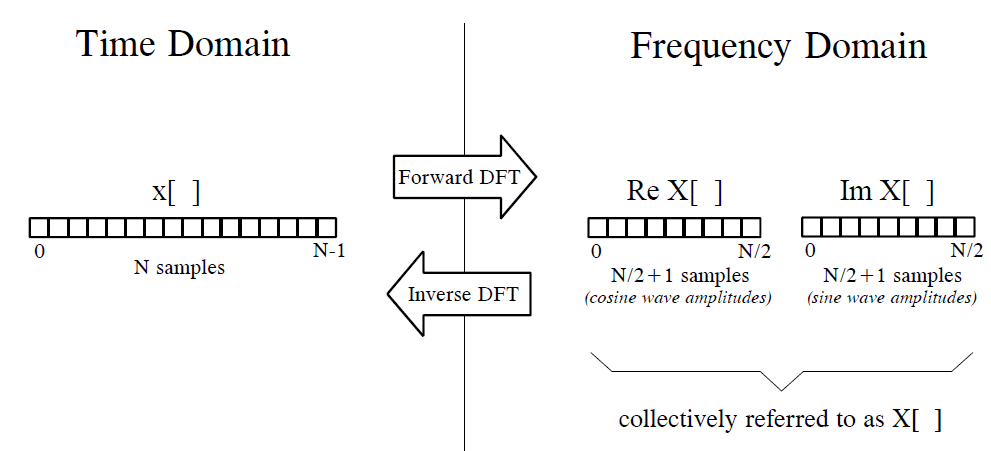

The term frequency domain is used to describe the amplitudes of the sine and cosine waves (including the special scaling we promised to explain).

Given the time domain signal, the process of calculating the frequency domain is called decomposition, analysis, the forward DFT, or simply, the DFT. If you know the frequency domain, calculation of the time domain is called synthesis, or the inverse DFT.

The number of samples in the time domain is usually represented by the variable $N$. While $N$ can be any positive integer, a power of two is usually chosen, i.e., 128, 256, 512, 1024, etc. There are two reasons for this. First, digital data storage uses binary addressing, making powers of two a natural signal length. Second, the most efficient algorithm for calculating the DFT, the Fast Fourier Transform (FFT), usually operates with $N$ that is a power of two. Typically, $N$ is selected between 32 and 4096. In most cases, the samples run from 0 to $N-1$ , rather than 1 to $N$.

Assume an $N$ point time domain signal is contained in $x[ ]$. The frequency domain of this signal is called $X[ ]$, and consists of two parts, each an array of $N/2-1$ samples. These are called the Real part of $X[ ]$ , written as: $Re X[ ]$, and the Imaginary part of $X[ ]$ , written as: Im $X[ ]$. The values in $ReX[ ]$ are the amplitudes of the cosine waves, while the values in $Im X[ ]$ are the amplitudes of the sine waves (not worrying about the scaling factors for the moment). Just as the time domain runs from $x[0]$ to $x[N-1]$ , the frequency domain signals run from $ReX[0]$ to $ReX[N/2]$, and from $ImX[0]$ to $Im X[N/2]$.

Let's look at several of these basis functions in detail. Figure (a) shows the cosine wave $c_0[]$ . This is a cosine wave of zero frequency, which is a constant. This is a cosine wave of zero frequency, which is a constant value of one. This means that $ReX[0]$ holds the average value of all the points in the time domain signal. In electronics, it would be said that $ReX[0]$ holds the DC offset. The sine wave of zero frequency, $s_0[]$ , is shown in (b), a, is shown in (b), a signal composed of all zeros. Since this can not affect the time domain signal being synthesized, the value of $Im X[0]$ is irrelevant, and always set to zero.

Here's a puzzle: If there are N samples entering the DFT, and $N+2$ samples exiting, where did the extra information come from? The answer: two of the output samples contain no information, allowing the other $N$ samples to be fully independent. As you might have guessed, the points that carry no information are $Im X[0]$ and $Im X[N/2]$, the samples that always have a value of zero.

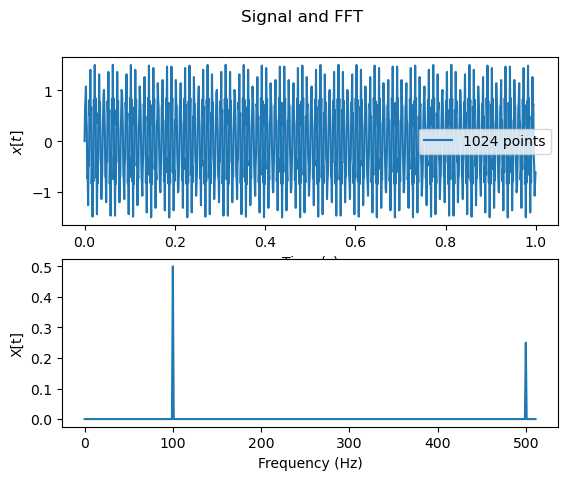

In [37]:
# Compute the Fourier Series coefficients of a simple function

N = 1024 # Hz, N = fs sampling rate
f1, f2 = 500, 100
t = np.linspace(0,1,N,endpoint=False) # 0 to 1 sec, not including endpoint=False is a common bug!
'''
For different durations set t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # Correct number of points
'''
x = 0.5*np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(t),1/N)


fig, ax = plt.subplots(2,1)
ax[0].plot(t,x,label=f'{N} points')
ax[1].plot(freqs[:N//2],np.abs(X[:N//2])/len(t)) 
# Don't care about negative frequency components, 
# Nyquist thm prevents any frequencies above N/2; higher than N/2 causes aliasing, 
# and // ensures integer division 
ax[0].set_xlabel(r'Time (s)')
ax[0].set_ylabel(r'$x[t]$')
ax[1].set_xlabel(r'Frequency (Hz)')
ax[1].set_ylabel(r'X[t]')
fig.suptitle('Signal and FFT')
ax[0].legend()
plt.show()

In [41]:
# Computing Fourier coefficients manually

def fourier_coeff(time,data,N,k):
    c_k = (1/N)*np.sum(data*np.exp(-(1j)*2*np.pi*time*k/N))
    return c_k

c0 = fourier_coeff(t,x,N,0)
c1 = fourier_coeff(t,x,N,1)
c100 = fourier_coeff(t,x,N,100)
c500 = fourier_coeff(t,x,N,500)

print(f'The Fourier coefficients are: c0 = {c0} and c1 = {c1}')

# The notable coefficients are c100 and c500, others will be near 0

print(f'The Fourier coefficients are: c100 = {c100} and c500 = {c500}')


The Fourier coefficients are: c0 = (6.418476861114186e-17+0j) and c1 = (2.918379422497952e-08+9.512408117059146e-06j)
The Fourier coefficients are: c100 = (0.0002827969399419603+0.0008926712591192289j) and c500 = (0.0030964576487264688+0.00011404928856074579j)


# Fourier Synthesis

Note the synthesis doesn't quite use the amplitudes from the frequency domain. There's a scaling factor:

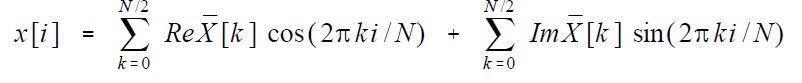

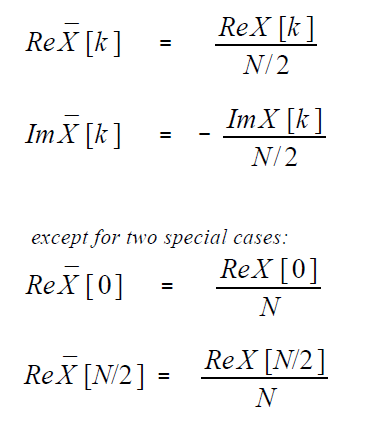

To do this in a computer program, three actions must be taken. First, divide all the values in the frequency domain by $N/2$ . Second, change the sign of all the imaginary values. Third, divide the first and last samples in the real part, $ReX[0]$ and $ReX[N/2 ]$, by two. This provides the amplitudes needed for the synthesis.

As you should expect, the samples run from 0 to 16, representing 17 frequencies equally spaced between 0 and 1/2 of the sampling rate. Spectral density describes how much signal (amplitude) is present per unit of bandwidth. To convert the sinusoidal amplitudes into a spectral density, divide each amplitude by the bandwidth represented by each amplitude. This brings up the next issue: how do we determine the bandwidth of each of the discrete frequencies in the frequency domain?

Expressed as a fraction of the total bandwidth (i.e., N/2 ), the bandwidth of each sample is 2/N. An exception to this is the samples on each end, which have one-half of this bandwidth, 1/N. Note that this is **not** saying the bandwidth is always 2/N.